# Lab 2

## Introduction
With this lab data grouping and graphing will be explored. There is always a great deal of information you can gather by grouping and comparing various columns within a dataframe. In addition for data summarization graphing is an important tool to have.

HTTP data will be used for this exercise. The data was generated from various PCAPs that have been collected that contain both legitimate traffic as well as traffic relating to exploit kits. While no malicious traffic is contained within the log file there are malicious domains and URLS (it's recommended you don't visit them). While this traffic was generated by running Bro over a series of PCAPS, similar data can be obtained from various Web Proxies, this is a nice cross over example of what is possible with your own data.

Some goals will be understand when the data was generated, what systems generated, high-level stats about the traffic, and the types of data transferred within the connections.

___

## Exercises

### File Input
Using what you learned in the last lab cread in the log (csv) file provided for you.

#### Hints
* The file name is in the current directory and is called *http.log*
* There is no header to the file
* It's *[TAB]* seperated
* The fields are: 'ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'trans_depth', 'method', 'host', 'uri', 'referrer', 'user_agent', 'request_body_len', 'response_body_len', 'status_code', 'status_msg', 'info_code', 'info_msg', 'filename', 'tags', 'username', 'password', 'proxied', 'orig_fuids', 'orig_mime_types', 'resp_fuids', 'resp_mime_types', 'sample'

In [1]:
import pandas as pd
http_df = pd.read_csv("http.log", header=None, sep="\t", names=['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'trans_depth', 'method', 'host', 'uri', 'referrer', 'user_agent', 'request_body_len', 'response_body_len', 'status_code', 'status_msg', 'info_code', 'info_msg', 'filename', 'tags', 'username', 'password', 'proxied', 'orig_fuids', 'orig_mime_types', 'resp_fuids', 'resp_mime_types', 'sample'])

<font color='blue'>
I kept getting a permission error. So I copied the log file from inside the http.log directory into the Lab_2 directory
</font>

### Clean-up the timestamp
Now that you've got the data imported, cleanup up the timestamp column *ts*. Don't forget to re-assign back to the *ts* column.

In [2]:
from datetime import datetime

In [3]:
http_df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,method,host,uri,...,filename,tags,username,password,proxied,orig_fuids,orig_mime_types,resp_fuids,resp_mime_types,sample
0,1.338423e+09,ChBJ7L2l1Vcl8PmMxh,192.168.88.10,1030,188.121.46.128,80,1,GET,myfecm.com,/,...,-,(empty),-,-,-,-,-,FmrItE3tE6uWAdmZV,text/html,NaN
1,1.338423e+09,CKH7Eu1pUtdXF8KKq8,192.168.88.10,1031,50.28.53.156,80,1,GET,www.daysofyorr.com,/release.js,...,-,(empty),-,-,-,-,-,FyKJaS1eo05A7BfpRj,text/plain,NaN
2,1.338423e+09,CMjfL821GNMgnPFTa9,192.168.88.10,1034,188.72.248.160,80,1,GET,potialosce.tk,/25433658.html,...,-,(empty),-,-,-,-,-,FzLBH53sLcK6bEiRai,text/html,NaN
3,1.338423e+09,Ckt4Bw4pZVSaU17gSg,192.168.88.10,1035,69.63.148.95,80,1,GET,www.12secondcommute.com,/common/formValidation.js,...,-,(empty),-,-,-,-,-,F6UaIl1po975GOkGJh,text/plain,NaN
4,1.338423e+09,ChBJ7L2l1Vcl8PmMxh,192.168.88.10,1030,188.121.46.128,80,2,GET,myfecm.com,/button_bg6.jpg,...,-,(empty),-,-,-,-,-,FjxdXz2z8deZMyEdvb,image/jpeg,NaN


In [4]:
http_df.shape

(807537, 28)

<font color='blue'>
The .shape command list the number of rows (first coordinate) and columns (second coordinate)
</font>

In [5]:
http_df['ts'] = [datetime.fromtimestamp(float(date)) for date in http_df['ts'].values]
http_df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,method,host,uri,...,filename,tags,username,password,proxied,orig_fuids,orig_mime_types,resp_fuids,resp_mime_types,sample
0,2012-05-30 17:09:27.177343,ChBJ7L2l1Vcl8PmMxh,192.168.88.10,1030,188.121.46.128,80,1,GET,myfecm.com,/,...,-,(empty),-,-,-,-,-,FmrItE3tE6uWAdmZV,text/html,NaN
1,2012-05-30 17:09:28.343725,CKH7Eu1pUtdXF8KKq8,192.168.88.10,1031,50.28.53.156,80,1,GET,www.daysofyorr.com,/release.js,...,-,(empty),-,-,-,-,-,FyKJaS1eo05A7BfpRj,text/plain,NaN
2,2012-05-30 17:09:29.124170,CMjfL821GNMgnPFTa9,192.168.88.10,1034,188.72.248.160,80,1,GET,potialosce.tk,/25433658.html,...,-,(empty),-,-,-,-,-,FzLBH53sLcK6bEiRai,text/html,NaN
3,2012-05-30 17:09:29.142869,Ckt4Bw4pZVSaU17gSg,192.168.88.10,1035,69.63.148.95,80,1,GET,www.12secondcommute.com,/common/formValidation.js,...,-,(empty),-,-,-,-,-,F6UaIl1po975GOkGJh,text/plain,NaN
4,2012-05-30 17:09:29.602005,ChBJ7L2l1Vcl8PmMxh,192.168.88.10,1030,188.121.46.128,80,2,GET,myfecm.com,/button_bg6.jpg,...,-,(empty),-,-,-,-,-,FjxdXz2z8deZMyEdvb,image/jpeg,NaN


<font color='blue'>
For converting timestamps from string to dates I typically use pd.to_datetime, but my results were not matching up with the code the author used in the last lab. So, I will continue to use his code for the timestamp conversion. 
    
I did linked some documentation for pd.to_datetime and datetime.fromtimestamp. 
</font>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
https://docs.python.org/3/library/datetime.html#datetime.date.fromtimestamp

In [ ]:
#http_df['ts'] = pd.to_datetime(http_df['ts'], unit='s')
#http_df.head()

In the next cell the timestamp column is set to be the new index of the dataframe. By default dataframes are indexed by the row number, and by indexing by timestamp it's easier to perform various types of time series analysis. After the assignment a quick **head()** is performed, and in the output you'll see that the *ts* has moved "down and to the left". The new location of the *ts* heading indicates that it is now the index, and has replaced the default.

In [6]:
http_df = http_df.set_index('ts')
http_df.head()

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,method,host,uri,referrer,...,filename,tags,username,password,proxied,orig_fuids,orig_mime_types,resp_fuids,resp_mime_types,sample
ts,,,,,,,,,,,,,,,,,,,,,
2012-05-30 17:09:27.177343,ChBJ7L2l1Vcl8PmMxh,192.168.88.10,1030,188.121.46.128,80,1,GET,myfecm.com,/,-,...,-,(empty),-,-,-,-,-,FmrItE3tE6uWAdmZV,text/html,NaN
2012-05-30 17:09:28.343725,CKH7Eu1pUtdXF8KKq8,192.168.88.10,1031,50.28.53.156,80,1,GET,www.daysofyorr.com,/release.js,http://myfecm.com/,...,-,(empty),-,-,-,-,-,FyKJaS1eo05A7BfpRj,text/plain,NaN
2012-05-30 17:09:29.124170,CMjfL821GNMgnPFTa9,192.168.88.10,1034,188.72.248.160,80,1,GET,potialosce.tk,/25433658.html,http://myfecm.com/,...,-,(empty),-,-,-,-,-,FzLBH53sLcK6bEiRai,text/html,NaN
2012-05-30 17:09:29.142869,Ckt4Bw4pZVSaU17gSg,192.168.88.10,1035,69.63.148.95,80,1,GET,www.12secondcommute.com,/common/formValidation.js,http://myfecm.com/,...,-,(empty),-,-,-,-,-,F6UaIl1po975GOkGJh,text/plain,NaN
2012-05-30 17:09:29.602005,ChBJ7L2l1Vcl8PmMxh,192.168.88.10,1030,188.121.46.128,80,2,GET,myfecm.com,/button_bg6.jpg,http://myfecm.com/,...,-,(empty),-,-,-,-,-,FjxdXz2z8deZMyEdvb,image/jpeg,NaN


In [7]:
http_df.shape

(807537, 27)

<font color='blue'>
Since the dataframe is now indexed by the ts column, the number of columns was reduced from 28 to 27.
</font>

### Selecting Based on Index Values

With the default indexing in dataframes you can select elements or slices of elements based on numbers (similarly to how lists work in Python). With a time indexed dataframe various parts of dates, or whole dates, can be used to select rows.

A year can be used eg: 2012, a year and month '2012-02' or a year, month and day '2012-02-20'.

In [8]:
http_df['2012-02-20':'2012-02-23'][http_df.columns.tolist()[2:7]].head()

,id.orig_p,id.resp_h,id.resp_p,trans_depth,method
ts,,,,,
2012-02-21 13:41:14.255273,1030,173.245.61.14,80,1,GET
2012-02-21 13:41:14.453622,1031,74.125.45.157,80,1,GET
2012-02-21 13:41:14.532165,1031,74.125.45.157,80,2,GET
2012-02-21 13:41:14.694098,1031,74.125.45.157,80,3,GET
2012-02-21 13:41:14.777528,1031,74.125.45.157,80,4,GET


<font color='blue'>
The results show the rows where the ts column is between '2012-02-20' and '2012-02-23' and the columns indexed between 2 and 7, exclusively. 
</font>

In [9]:
http_df['2012-02-20':'2012-02-23']['id.orig_h'].head()

ts
2012-02-21 13:41:14.255273    192.168.4.10
2012-02-21 13:41:14.453622    192.168.4.10
2012-02-21 13:41:14.532165    192.168.4.10
2012-02-21 13:41:14.694098    192.168.4.10
2012-02-21 13:41:14.777528    192.168.4.10
Name: id.orig_h, dtype: object

<font color='blue'>
Similarly, a range of dates can be extracted when the column name is explicitly called instead of using a list. 
</font>

In [10]:
len(http_df.index)

807537

<font color='blue'>
The len command is showing how long (the length) is the index of http_df.
</font>

### Time Resampling
Time indexed information can be resampled and summarized.

Below is a resampling on day *D* that will count up the number of occurrences per day. Try various date selections to get a feel for how the sampling works and how it can be used to summarize data.

In [11]:
%time
temp_df = http_df['2012-02-20':'2012-02-25']
temp_df.resample("D").count().head()

Wall time: 0 ns


,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,method,host,uri,referrer,...,filename,tags,username,password,proxied,orig_fuids,orig_mime_types,resp_fuids,resp_mime_types,sample
ts,,,,,,,,,,,,,,,,,,,,,
2012-02-20,1581,1581,1581,1581,1581,1581,1581,1581,1581,1581,...,1581,1581,1581,1581,1581,1581,1581,1581,1581,0
2012-02-21,589,589,589,589,589,589,589,589,589,589,...,589,589,589,589,589,589,589,589,589,0
2012-02-22,2573,2573,2573,2573,2573,2573,2573,2573,2573,2573,...,2573,2573,2573,2573,2573,2573,2573,2573,2573,0
2012-02-23,428,428,428,428,428,428,428,428,428,428,...,428,428,428,428,428,428,428,428,428,0
2012-02-24,1982,1982,1982,1982,1982,1982,1982,1982,1982,1982,...,1982,1982,1982,1982,1982,1982,1982,1982,1982,0


<font color='blue'>
    The percent sign (%) in front of time is a magic command native to Jupyter Notebooks. %time will display the time it took to run the commands in the cell.
    
   I modified the line containing the resample command due to a depreciation warning. The daily counts are displayed across the columns. There are other (more interesting) quantitative methods to use on resample like mean and sum. 
    
https://blog.dominodatalab.com/lesser-known-ways-of-using-notebooks/

https://www.geeksforgeeks.org/python-pandas-dataframe-resample/
</font>


Try the resample example from above with some of the other options for resample. Replace the *D* with some other values to get different frequencies.

| Alias | Description
| ------| -----------
| B | business day frequency
| C | custom business day frequency (experimental)
| D | calendar day frequency
| W | weekly frequency
| M | month end frequency
| BM | business month end frequency
| CBM | custom business month end frequency
| MS | month start frequency
| BMS | business month start frequency
| CBMS | custom business month start frequency
| Q | quarter end frequency
| BQ | business quarter end frequency
| QS | quarter start frequency
| BQS | business quarter start frequency
| A | year end frequency
| BA | business year end frequency
| ASyear | start frequency
| BAS | business year start frequency
| H | hourly frequency
| T | minutely frequency
| S | secondly frequency
| L | milliseonds
| U | microseconds


In [12]:
http_df['2012-02-20':'2012-02-25'].resample("H").count().head()

,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,trans_depth,method,host,uri,referrer,...,filename,tags,username,password,proxied,orig_fuids,orig_mime_types,resp_fuids,resp_mime_types,sample
ts,,,,,,,,,,,,,,,,,,,,,
2012-02-20 11:00:00,951,951,951,951,951,951,951,951,951,951,...,951,951,951,951,951,951,951,951,951,0
2012-02-20 12:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-02-20 13:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-02-20 14:00:00,127,127,127,127,127,127,127,127,127,127,...,127,127,127,127,127,127,127,127,127,0
2012-02-20 15:00:00,503,503,503,503,503,503,503,503,503,503,...,503,503,503,503,503,503,503,503,503,0


<font color='blue'>
The hourly counts between 2012-02-20 and 2012-02-25 are displayed across the columns.
    
The head command can be removed to reveal the rest of the timestamps for ts.
</font>

### Graphing Time Series Data
After getting a grasp on the various ways to look at time indexed data, it's useful to display it visually. With this section the same progression as above will be used.

The cell below will generate a time series graph of both the request and response bodies, summed up over their timestamps.

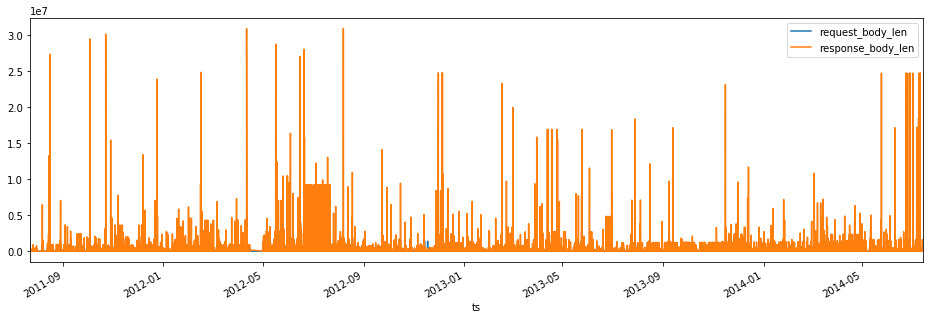

In [14]:
import matplotlib
from matplotlib import rcParams, pyplot as plt
rcParams['figure.figsize'] = (16.0, 5.0)
rcParams['agg.path.chunksize'] = 10000

df = http_df[['request_body_len','response_body_len']]
df.plot()

<font color='blue'>
I was getting a NameError issue for pylab, so I modified the import command. See below

https://stackoverflow.com/questions/35463670/what-is-the-preferred-way-to-import-pylab-at-a-function-level-in-python-2-7

rcParams is used to set the plot to a certain length and width.

I ran the cell twice since the figure did not show up the first time. 

The time series plot looks neat, but the magnitude of response_body_len ($10^7$) makes it hard to visualize request_body_len. Maybe a logarithm scale would useful or normalize the variables individually so that they are on the same scale. 
</font>

[]

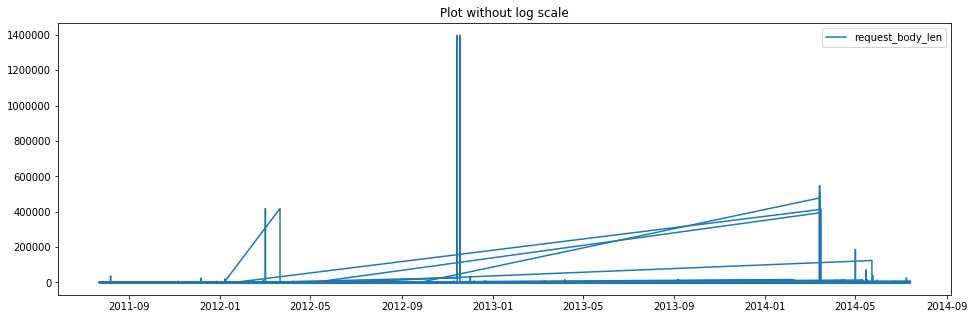

In [15]:
plt.plot(df.index,df.request_body_len)
plt.legend(['request_body_len'])
plt.title('Plot without log scale')
plt.plot()

[]

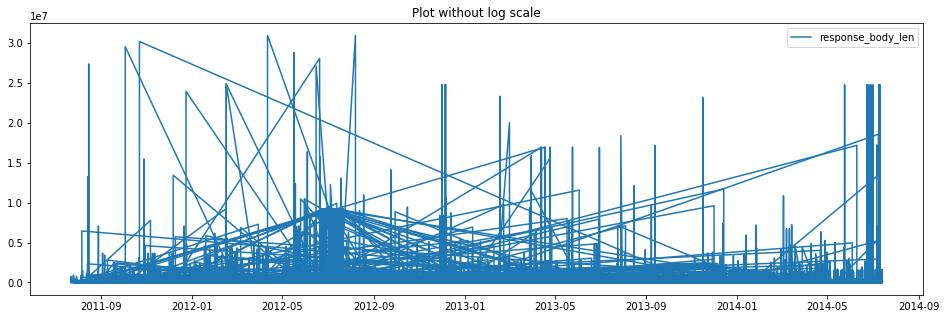

In [16]:
plt.plot(df.index,df.response_body_len)
plt.legend(['response_body_len'])
plt.title('Plot without log scale')
plt.plot()

[]

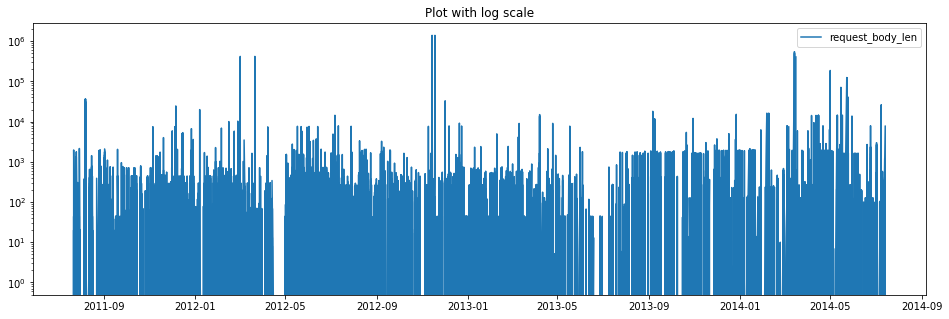

In [17]:
plt.plot(df.index,df.request_body_len)
plt.legend(['request_body_len'])
plt.title('Plot with log scale')
plt.yscale("log")
plt.plot()

[]

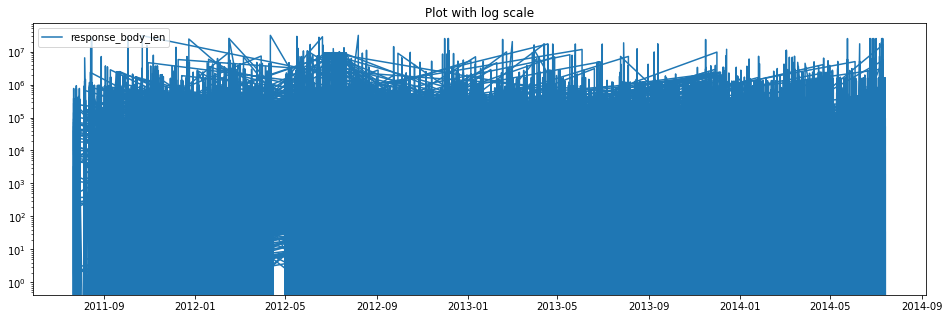

In [18]:
plt.plot(df.index,df.response_body_len)
plt.legend(['response_body_len'])
plt.title('Plot with log scale')
plt.yscale("log")
plt.plot()

<font color='blue'>
I have plotted the variables separately, before and after applying the logarithmic (log) scale on the y-axis. We can see the trends of request_body_len better with the log scale. Yet the response_body_len plot looks all over the place and dense. 

https://stackoverflow.com/questions/46374209/logarithmic-scale-in-python

The last plot had an OverflowError issue: https://stackoverflow.com/questions/37470734/matplotlib-giving-error-overflowerror-in-draw-path-exceeded-cell-block-limit

I did use matplotlib commands to create plots which uses quite a few series of commands to create the final result. 
</font>

A small copy of the HTTP dataframe **http_df** is stored in **df** it only contains 2 columns *[request_body_len, response_body_len]*, this enables the comparison of the request and response body lengths.

Below is another way to graph the resampled data. In this case the data is resampled on *month*, and when no **how** parameter is passed to **resample()** it defaults to *mean*.

#### Hint
If you're going to use anything but *'count'* as the paremeter to **how**, you need to make sure it's numeric data.

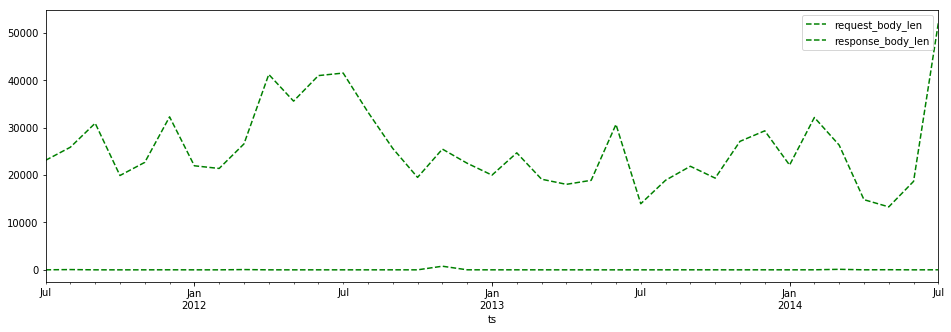

In [19]:
resamp = df.resample("M").mean()
resamp.plot(style='g--')

<font color='blue'>
I just added the mean command at the end to get the graph since how is deprecated: 
    
 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

The colors look too similar. I am guessing the flat-like line at the bottom is request_body_len and the curvy line is response_body_len.
</font>

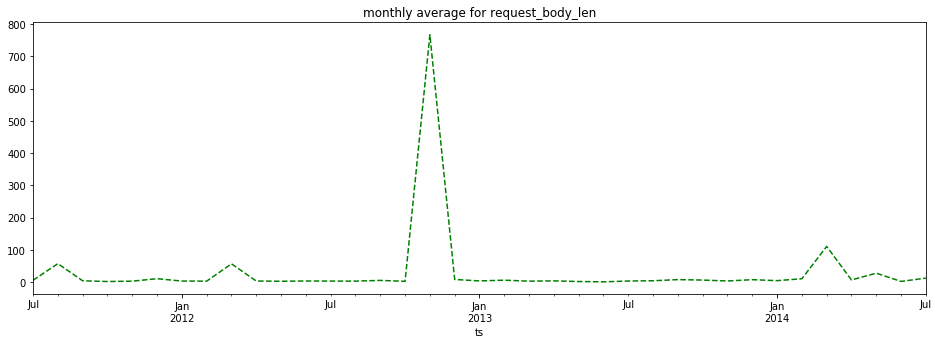

In [20]:
resamp = df.request_body_len.resample("M").mean()
resamp.plot(style='g--',title='monthly average for request_body_len')

<font color='blue'>
I plotted the resamp plot for only request_body_len. The values are quite small in comparison to the resampling of response_body_len so that is why request_body_len looks like a flat line in the plot before this one.
    
This plot does show an abnormally large average length for the body of the request for the month of November 2013.
</font>

### Graphing Multiple Views (Time Series)
It's possible to graph multiple **how** methods as well. This can help identify different patterns in the data.

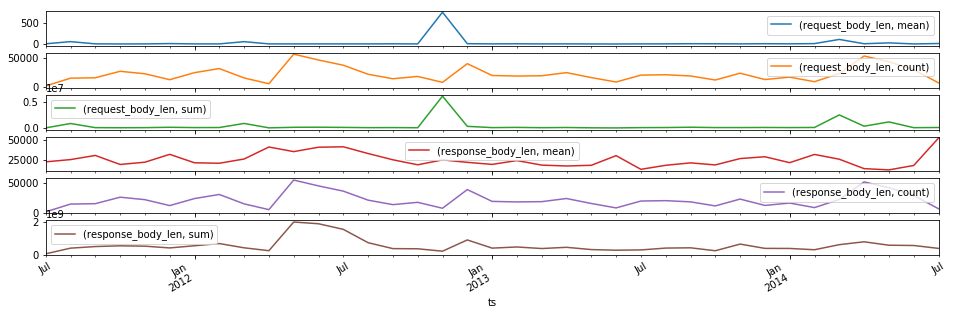

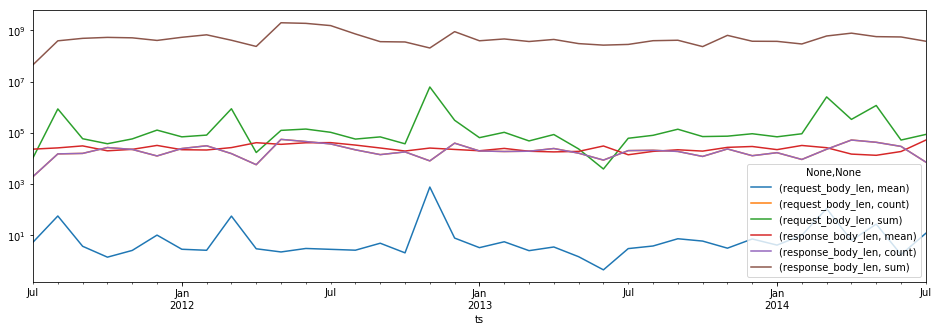

In [21]:
resamp = df.resample("M").agg(['mean', 'count', 'sum'])
resamp.plot(subplots=True)
resamp.plot(logy=True)

<font color='blue'>
Instead of using how, I applied .agg to get similar results as the solution:  
    
https://stackoverflow.com/questions/22128218/pandas-how-to-apply-multiple-functions-to-dataframe

For some reason only two lines was plotted for the last figures, so I added logy=True in the plot command.
https://kanoki.org/2019/09/16/dataframe-visualization-with-pandas-plot/
</font>


Above, the response_body_len sum really sticks out in the bottom graph, but viewing the smaller graphs above it's possible to see that it's not because of an increase in the number of requests (it's simply because more information was received, in aggregate, over all the connections).

___

Below, the *count* column was added for you, try doing the same type graph as above and incorporate **np.min** and **np.max** into your resampling.

#### Hint
Do not put single quotes around **np.min** or **np.max**.

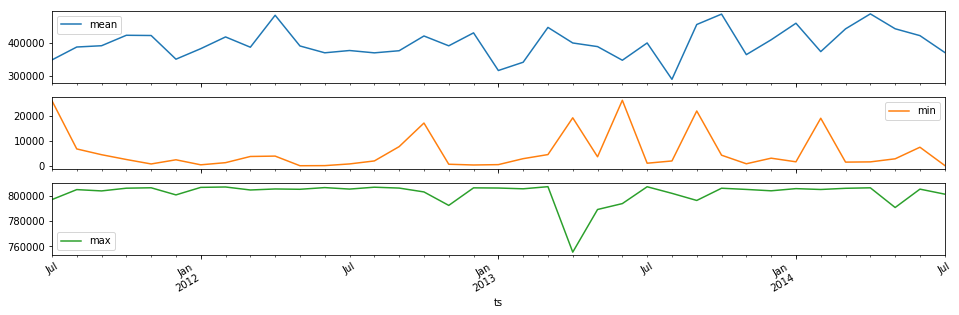

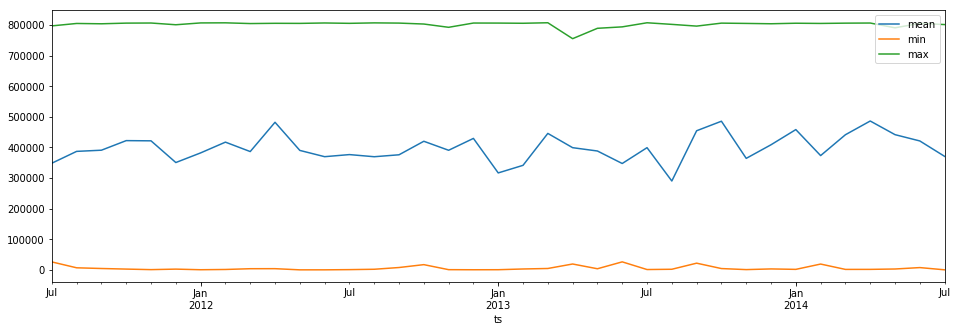

In [22]:
pd.options.mode.chained_assignment = None 
df['count'] = 1
df=df['count'].cumsum()
resamp = df.resample("M").agg(['mean', 'min', 'max'])
resamp.plot(subplots=True)
resamp.plot()

<font color='blue'>
I had an issue with the SettingWithCopyWarning. I could figure out which line to debug so I disabled chained assignments.

https://stackoverflow.com/questions/49728421/pandas-dataframe-settingwithcopywarning-a-value-is-trying-to-be-set-on-a-copy
</font>




### Dataframe Grouping
Another useful way to look at data is how different groups of values look with one another. For this pandas offers the **groupby()** command. It allows you to specify an arbitrary list of columns in your dataframe that are evaluated left-to-right in terms of grouping.

The example below shows how *resp_mime_type* (filetype returned by the server) breaks down, and then per-filetype what *user_agents* requested those files. You can see the number of entries per-column per-value in the table.

In [23]:
http_df.groupby(['resp_mime_types','user_agent']).count()

uid  \
resp_mime_types user_agent                                                 
-               (empty)                                              169   
                -                                                    582   
                ????1                                                  1   
                AYAgent.aye                                            1   
                B2BFB2BDDEC2B5B7C7B1C1A786819A9D94A8C4C5C7CBC4D...     7   
                DefaultPack                                           14   
                Dv4                                                    2   
                Google page                                            1   
                Googlebot/2.1 (+http://www.google.com/bot.html)        2   
                IE                                                    61   
                IE 9.0                                                 1   
                IE7.0                                                 22   
                Internet Explorer                                     25   
                Java/1.6.0_10                                         30   
                MSIE 9.0                                               1   
                Microsoft BITS/6.6                                     4   
                Microsoft Internet Explorer/1.0 (Windows 95)           1   
                Microsoft-CryptoAPI/5.131.2600.2180                    4   
                Microsoft-WebDAV-MiniRedir/5.1.2600                  118   
                Mozilla/1.22 (compatible; MSIE 10.0; Windows 3.1)      3   
                Mozilla/3.0 (compatible; Indy Library)                18   
                Mozilla/4.0                                          262   
                Mozilla/4.0 (Windows XP 5.1) Java/1.6.0_10          1624   
                Mozilla/4.0 (Windows; U; Windows NT 5.1; en-US;...     1   
                Mozilla/4.0 (compatible. MSIE 8.0. Windows NT 5.1)     1   
                Mozilla/4.0 (compatible; 2600.xpsp_sp2_rtm.0408...     1   
                Mozilla/4.0 (compatible; MSIE 10.0; Windows NT ...     1   
                Mozilla/4.0 (compatible; MSIE 2.0; Windows NT 5...    24   
                Mozilla/4.0 (compatible; MSIE 4.01; Windows NT ...     1   
                Mozilla/4.0 (compatible; MSIE 5.01; Windows NT ...     4   
...                                                                  ...   
text/x-c        Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...   998   
                Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 6.0)     2   
                Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5...     6   
                Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...   296   
                Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.4 ...     3   
                Mozilla/5.0 (Windows NT 6.1; WOW64; rv:17.0) Ge...     1   
                Mozilla/5.0 (Windows NT 6.3; Trident/7.0; Touch...     1   
                Mozilla/5.0 (Windows; U; Windows NT 6.0; en-GB;...     1   
                Mozilla/5.0 (compatible; MSIE 10.0; Windows NT ...     2   
                Mozilla/5.0 (compatible; MSIE 10.0; Windows NT ...     1   
text/x-c++      Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...    24   
                Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...     4   
text/x-pascal   Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...    23   
                Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...     9   
text/x-php      Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...     7   
video/mp2p      Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...     2   
video/mp4       Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...    45   
                Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...    34   
                Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.4 ...     1   
                Mozilla/5.0 (compatible; MSIE 10.0; Windows NT ...     1   
video/x-flv     Mozilla/4.0 (compatible; 

<font color='blue'>
Information like this, gives us insight into what are the most and least common user agents per filetype. We can also see some interesting interesting user agents paired with a filetype. 
</font>

It's also possible to select rows (as learned in Lab 1) and then do a **groupby()** to look at various sub views of the data.

This looks at all rows associated with those 2 different *user_agent*s, and then shows how many entries are in the data per-user-agent per-filetype.

In [24]:
http_df[http_df['user_agent'].isin(
    ['Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1)',
     'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5.1; Trident/4.0)'])].groupby(['resp_mime_types','user_agent']).count()

uid  \
resp_mime_types                      user_agent                                                  
-                                    Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...  64458   
                                     Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...  45411   
application/msword                   Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...      1   
                                     Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...      1   
application/octet-stream             Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...    775   
                                     Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...    875   
application/pdf                      Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...   2768   
                                     Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...    143   
application/vnd.ms-cab-compressed    Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...     29   
                                     Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...     12   
application/vnd.ms-fontobject        Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...   1008   
                                     Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...   1151   
application/vnd.ms-opentype          Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...     25   
                                     Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...     23   
application/x-123                    Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...     52   
                                     Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...     19   
application/x-bittorrent             Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...      4   
application/x-dosexec                Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...   5685   
                                     Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...   2643   
application/x-dosexec,binary         Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...      2   
                                     Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...     24   
application/x-dosexec,text/plain     Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...      1   
application/x-elc                    Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...    496   
                                     Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...     72   
application/x-font-ttf               Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...     29   
                                     Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...     16   
application/x-gzip                   Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...     14   
application/x-shockwave-flash        Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...   7328   
                                     Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...   2482   
application/x-shockwave-flash,binary Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...      2   
...                                                                                        ...   
image/png                            Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...  19078   
image/svg+xml                        Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...     47   
image/tiff                           Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...      7   
image/x-icon                         Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...     62   
                                     Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...    432   
image/x-ms-bmp                       Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...     90   
                                     Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5...     45   
text/html                            Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5...  94276   
                                     Mozilla/4.0 (compatible; MSIE 8.0; W

<font color='blue'>
I have not used .isin() myself, but it looks handy to filter values/records. I have linked the documentation below for it.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html
</font>

Use the pre-defined filetypes below to come up with a couple of interesting views on the data that involve the **groupby()** function.

In [25]:
executable_types = set(['application/x-dosexec', 'application/octet-stream', 'binary', 'application/vnd.ms-cab-compressed'])
common_exploit_types = set(['application/x-java-applet','application/pdf','application/zip','application/jar','application/x-shockwave-flash'])

<font color='blue'>
Both the variables executable_types and common_exploit_types are Python sets, created by using lists. 

https://www.programiz.com/python-programming/set
</font>

### Graphing Groupby Data
One advantage of the **groupby()** command is being able to graph the output to get another view into the data. One popular way to do this is via a bar graph.

In the next cell there are a couple of things going on. First, a column named *count* is created and every row in that column is assigned the value of 1. This creates a column that we can use pandas to sum on since it has a value of 1 for each row.

In the second line, the dataframe is grouped by *resp_mime_types* and then only the *count* column is viewed/returned from the **groupby()** command. The result is then passed to the **sum()** function, this causes the sum on the *count* column, which due to the trick above has a value of 1 for each row. Combined this gets the number of files in each filetype. The result is simply plotted with **plot()**.

Any surprising results? What could they possibly indicate?

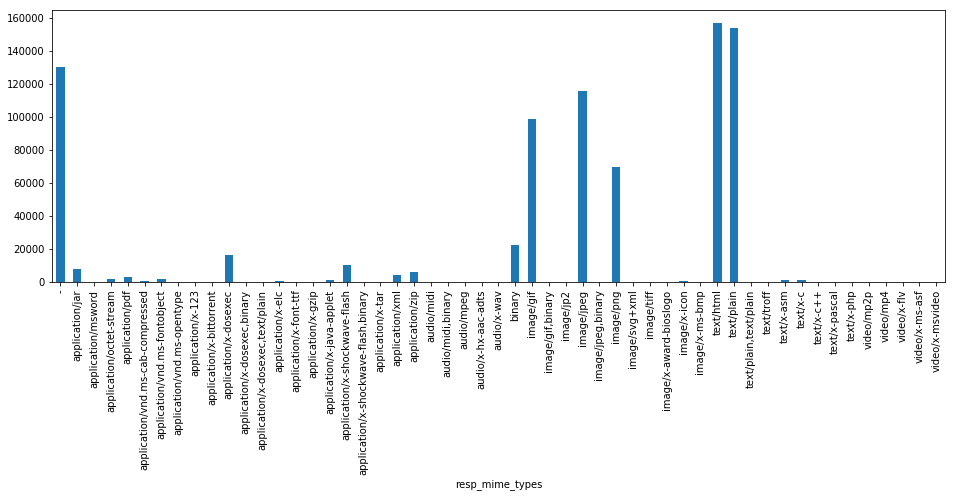

In [26]:
http_df['count'] = 1
http_df.groupby('resp_mime_types')['count'].sum().plot(kind='bar')

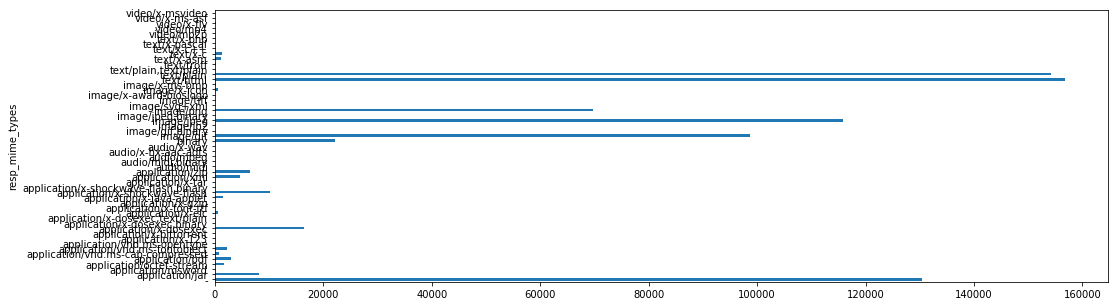

In [27]:
http_df.groupby('resp_mime_types')['count'].sum().plot.barh()

<font color='blue'>
If the labels are long in the x-axis of a bar chart, I would create use a horizontal bar chart instead. The labels are still hard to read, so I created a pie chart. Some of the labels are readable, but for issues like this I would maybe try to plot the top values, create a table, or create an interactive plot using HoloViz.  
</font>

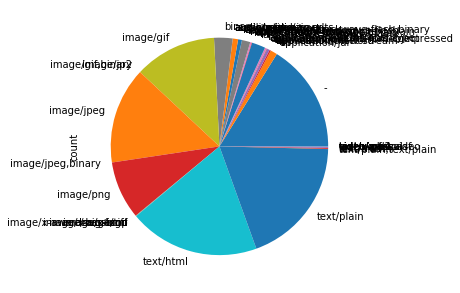

In [28]:
http_df.groupby('resp_mime_types')['count'].sum().plot.pie()

In [29]:
http_df.groupby('resp_mime_types')['count'].sum().sort_values(ascending=False).head()

resp_mime_types
text/html     156818
text/plain    154173
-             130441
image/jpeg    115827
image/gif      98738
Name: count, dtype: int64

<font color='blue'>
Above is a table showing the top five resp_mime_types. 
</font>

The technique above can be used to look at the number of samples associated with each IP in dataset.

What kinds of conclusions can you draw based on the graph below?

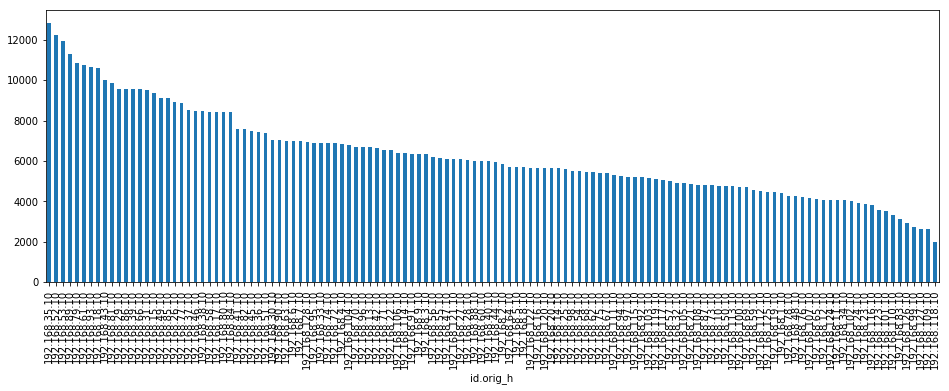

In [31]:
http_df.groupby('id.orig_h')['count'].sum().sort_values(ascending=False).plot(kind='bar')

<font color='blue'>
There was error when using .order() so I replaced it with .sort_values(). 
</font>

That's a lot of IP addresses! Bonus question: How many different source IP addresses are in the data set?

Remember above when we said you could access elements in a dataframe that weren't indexed by a timestamp like a regular Python array? Well, it's possible to do the same with dataframes produced by **groupby()**. By sliding around the dataset below what can you learn about the IP addresses that wasn't possible to see because of the resolution of the graph above?

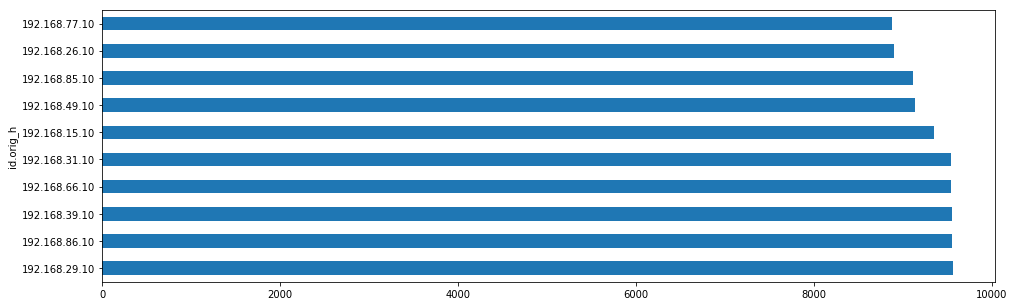

In [32]:
http_df.groupby('id.orig_h')['count'].sum().sort_values(ascending=False)[10:20].plot.barh()

### Stacked Groupby Graphs With Bonus Colors
Once you learn the basic bar graph, it's time to kick it up a notch by looking at the relationship between two different columns. This can be done with stacked bar charts.

In this case the relationship between filetype and HTTP method can be explored. Perhaps one or two HTTP methods are more responsible for specific filetypes vs. others. Custom colors can be created with the values in the **colors** list, and passed into the graph with **color=colors**. Similar to the examples above we're using our added *count* column to get the number of things. In this example multiple tiers are used for **groupby()** since the breakdown of methods by filetype are being explored. The **unstack()** function "expands" the grouped columns, and **fillna(0)** fills all non-values with zero (since these won't impact the sum).

What happens when you remove the custom color labels?

Bonus: Create a new cell and take a look at what the dataframe looks like without the **plot()** or other commands stacked on top of one another. This is useful to do to understand the output of each function in the chain.

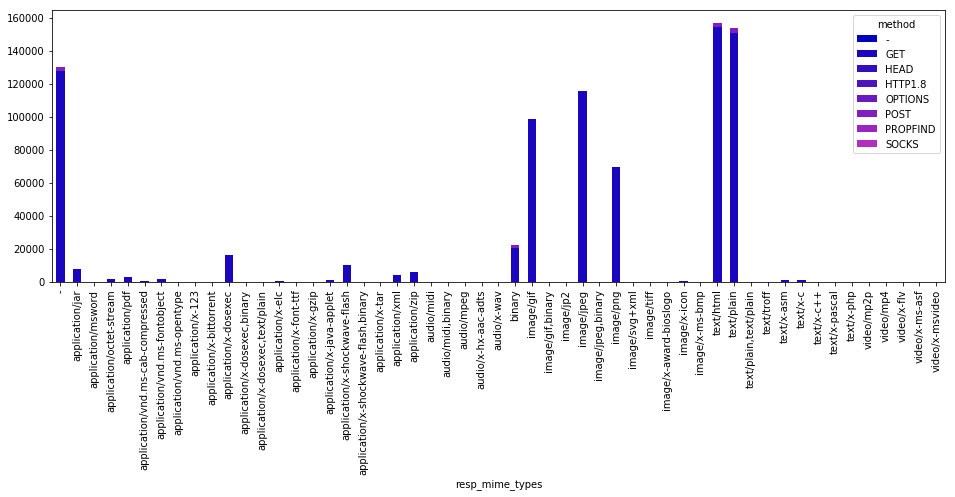

In [33]:
colors = [(x/10.0, x/40.0, 0.75) for x in range(len(http_df['method'].unique().tolist()))]
http_df.groupby(['resp_mime_types','method'])['count'].sum().unstack('method').fillna(0).plot(
    color=colors, kind='bar', stacked=True, grid=False)

<font color='blue'>
The colors are difficult to see in the stacked bar chart. I would have used a different color mapping or modify the RGB values. 
</font>

In [34]:
http_df.groupby(['resp_mime_types','method'])['count'].sum().unstack('method').fillna(0)

method,-,GET,HEAD,HTTP1.8,OPTIONS,POST,PROPFIND,SOCKS
resp_mime_types,,,,,,,,
-,55.0,127796.0,51.0,12.0,107.0,2407.0,11.0,2.0
application/jar,0.0,8078.0,0.0,0.0,0.0,0.0,0.0,0.0
application/msword,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
application/octet-stream,0.0,1715.0,0.0,0.0,0.0,11.0,0.0,0.0
application/pdf,0.0,2912.0,0.0,0.0,0.0,0.0,0.0,0.0
application/vnd.ms-cab-compressed,0.0,778.0,0.0,0.0,0.0,0.0,0.0,0.0
application/vnd.ms-fontobject,0.0,2191.0,0.0,0.0,0.0,0.0,0.0,0.0
application/vnd.ms-opentype,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0
application/x-123,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0


<font color='blue'>
When removing the plot command, we get a table of the resulting sum. There is quite a bit of sparsity (zeroes). In addition, GET is the most common method across the different filetypes.  
</font>

## Final Exercise
The final challenge is using all the techniques from above to create a stacked bar chart that shows: only for destination ports 81, 88, and 8080 how many of each HTTP method is associated with each port. The **plot()** command is present to show another way to specify different custom colors.

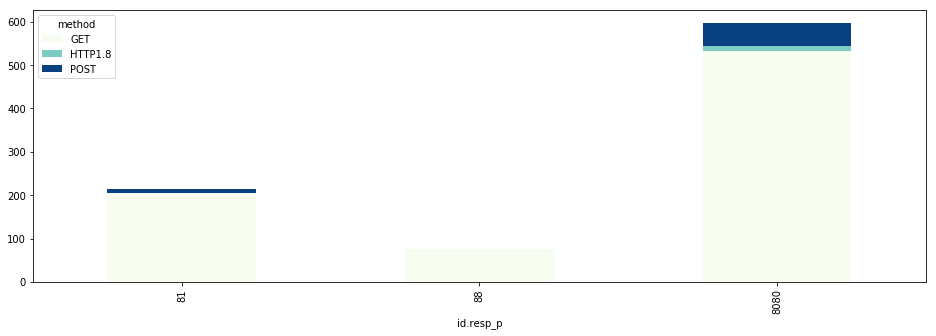

In [35]:
http_df[http_df['id.resp_p'].isin(
    [81, 88, 8080])].groupby(['id.resp_p','method'])['count'].sum().unstack('method').fillna(0).plot(colormap='GnBu', kind='bar', stacked=True, grid=False)

<font color='blue'>
Use .isin() to filter the destination ports (id.resp_p) for 81, 88, and 8080. Apply .groupby() with .unstack() to create a table where each row is a value for id.resp_p and each column is a value for method. 
</font>

In [36]:
http_df[http_df['id.resp_p'].isin(
    [81, 88, 8080])].groupby(['id.resp_p','method'])['count'].sum().unstack('method').fillna(0)

method,GET,HTTP1.8,POST
id.resp_p,,,
81,206.0,0.0,9.0
88,76.0,0.0,0.0
8080,532.0,12.0,53.0


<font color='blue'>
Final comment:
    
This lab gave a good introduction to time series plotting and grouping columns in dataframe. Time series allows us to look at data over time and baseline behavior. Though without additional context, it can be difficult to determine if abnormal behavior needs futher investigation. The techniques used in this lab to filter and group data is quite useful to drill down on points of interest. 
    
Tables and charts are great to present information, but I would be careful about presenting too much information such that it makes it difficult for the reader to understand. This is a general problem with security datasets as there tends to be too much data to summarize it in a digestible manner. In addition, it takes practice to understand which data visualization technique is best for your data. Other comestic issues are making sure the labels are a decent font size and are readable, picking distinguishable colors, transformaing the data to be on the same scale. 
</font>